# Precificando Jogadores de Futebol

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Coleta de dados
Nesta seção iremos coletar os dados por meio de web scraping e apis de outros sites

### Obtendo dados das transferências para um range de temporadas da Premier League (demora 3 a 6 segundos por temporada, depende da internet)

In [112]:
pl_transfers = pd.read_csv('data/pl_transfers.csv')

# Análise exploratória dos dados
Nesta seção iremos apresentar análises e visualizações dos dados para entender melhor as relações entre variáveis, padrões relevantes e bons insights

In [113]:
pl_transfers

,playerName,playerLink,playerAge,playerPos,playerCountry,playerMarketValue,transferFee,clubLeft,clubLeftUrl,clubJoined,clubJoinedUrl,teamTransferType,season,valuation
0,Joe Murphy,/joe-murphy/profil/spieler/3655,20,GK,Ireland,50000,250000,Tranmere Rovers,/tranmere-rovers/startseite/verein/1074,West Bromwich Albion,/west-bromwich-albion/startseite/verein/984,out,2002,-200000
1,Cristiano Ronaldo,/cristiano-ronaldo/profil/spieler/8198,18,CF,Portugal,15000000,19000000,Sporting CP,/sporting-lissabon/startseite/verein/336,Manchester United,/manchester-united/startseite/verein/985,out,2003,-4000000
2,Gaël Clichy,/gael-clichy/profil/spieler/7449,18,LB,France,100000,375000,AS Cannes,/as-cannes/startseite/verein/895,Arsenal FC,/fc-arsenal/startseite/verein/11,out,2003,-275000
3,Scott Carson,/scott-carson/profil/spieler/14555,19,GK,England,200000,1400000,Leeds United,/leeds-united/startseite/verein/399,Liverpool FC,/fc-liverpool/startseite/verein/31,out,2004,-1200000
4,James Milner,/james-milner/profil/spieler/3333,18,CM,England,1500000,7400000,Leeds United,/leeds-united/startseite/verein/399,Newcastle United,/newcastle-united/startseite/verein/762,out,2004,-5900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,Pedro Porro,/pedro-porro/profil/spieler/553875,23,RB,Spain,40000000,45000000,Sporting CP,/sporting-lissabon/startseite/verein/336,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,out,2023,-5000000
1667,Dejan Kulusevski,/dejan-kulusevski/profil/spieler/431755,23,RW,Sweden,50000000,30000000,Juventus FC,/juventus-turin/startseite/verein/506,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,out,2023,20000000
1668,Arthur Masuaku,/arthur-masuaku/profil/spieler/181380,29,LB,DR Congo,6000000,2000000,West Ham United,/west-ham-united/startseite/verein/379,Besiktas JK,/besiktas-istanbul/startseite/verein/114,in,2023,4000000
1669,Boubacar Traoré,/boubacar-traore/profil/spieler/649020,21,DM,Mali,5000000,11000000,FC Metz,/fc-metz/startseite/verein/347,Wolverhampton Wanderers,/wolverhampton-wanderers/startseite/verein/543,out,2023,-6000000


In [114]:
pl_transfers.describe()

,playerAge,playerMarketValue,transferFee,season,valuation
count,1671.000000,1.671000e+03,1.671000e+03,1671.000000,1.671000e+03
mean,23.573908,9.031999e+06,1.280912e+07,2016.362657,-3.777118e+06
std,3.493246,1.472323e+07,1.585389e+07,4.147016,1.424741e+07
min,16.000000,1.000000e+04,4.000000e+04,2002.000000,-1.250000e+08
25%,21.000000,6.000000e+05,2.760000e+06,2014.000000,-8.000000e+06
50%,23.000000,2.800000e+06,7.500000e+06,2017.000000,-2.400000e+06
75%,26.000000,1.200000e+07,1.650000e+07,2020.000000,2.800000e+05
max,36.000000,1.800000e+08,1.350000e+08,2023.000000,1.200000e+08


In [115]:
pl_transfers_out = pl_transfers[pl_transfers['teamTransferType'] == 'out']

pl_transfers_out

,playerName,playerLink,playerAge,playerPos,playerCountry,playerMarketValue,transferFee,clubLeft,clubLeftUrl,clubJoined,clubJoinedUrl,teamTransferType,season,valuation
0,Joe Murphy,/joe-murphy/profil/spieler/3655,20,GK,Ireland,50000,250000,Tranmere Rovers,/tranmere-rovers/startseite/verein/1074,West Bromwich Albion,/west-bromwich-albion/startseite/verein/984,out,2002,-200000
1,Cristiano Ronaldo,/cristiano-ronaldo/profil/spieler/8198,18,CF,Portugal,15000000,19000000,Sporting CP,/sporting-lissabon/startseite/verein/336,Manchester United,/manchester-united/startseite/verein/985,out,2003,-4000000
2,Gaël Clichy,/gael-clichy/profil/spieler/7449,18,LB,France,100000,375000,AS Cannes,/as-cannes/startseite/verein/895,Arsenal FC,/fc-arsenal/startseite/verein/11,out,2003,-275000
3,Scott Carson,/scott-carson/profil/spieler/14555,19,GK,England,200000,1400000,Leeds United,/leeds-united/startseite/verein/399,Liverpool FC,/fc-liverpool/startseite/verein/31,out,2004,-1200000
4,James Milner,/james-milner/profil/spieler/3333,18,CM,England,1500000,7400000,Leeds United,/leeds-united/startseite/verein/399,Newcastle United,/newcastle-united/startseite/verein/762,out,2004,-5900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,Christopher Nkunku,/christopher-nkunku/profil/spieler/344381,25,SS,France,80000000,65000000,RB Leipzig,/rasenballsport-leipzig/startseite/verein/23826,Chelsea FC,/fc-chelsea/startseite/verein/631,out,2023,15000000
1664,Yankuba Minteh,/yankuba-minteh/profil/spieler/1012534,18,RW,The Gambia,300000,7000000,Odense Boldklub,/odense-boldklub/startseite/verein/173,Newcastle United,/newcastle-united/startseite/verein/762,out,2023,-6700000
1666,Pedro Porro,/pedro-porro/profil/spieler/553875,23,RB,Spain,40000000,45000000,Sporting CP,/sporting-lissabon/startseite/verein/336,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,out,2023,-5000000
1667,Dejan Kulusevski,/dejan-kulusevski/profil/spieler/431755,23,RW,Sweden,50000000,30000000,Juventus FC,/juventus-turin/startseite/verein/506,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,out,2023,20000000


In [126]:
pl_transfers_in = pl_transfers[pl_transfers['teamTransferType'] == 'in']

pl_transfers_in

,playerName,playerLink,playerAge,playerPos,playerCountry,playerMarketValue,transferFee,clubLeft,clubLeftUrl,clubJoined,clubJoinedUrl,teamTransferType,season,valuation
8,Neil Danns,/neil-danns/profil/spieler/4108,21,CM,Guyana,75000,50000,Blackburn Rovers,/blackburn-rovers/startseite/verein/164,Colchester United,/colchester-united/startseite/verein/1060,in,2004,25000
23,Darren Pratley,/darren-pratley/profil/spieler/28957,21,CM,England,75000,150000,Fulham FC,/fc-fulham/startseite/verein/931,Swansea City,/swansea-city/startseite/verein/2288,in,2006,-75000
24,Joe Garner,/joe-garner/profil/spieler/46111,18,CF,England,75000,210000,Blackburn Rovers,/blackburn-rovers/startseite/verein/164,Carlisle United,/carlisle-united/startseite/verein/1220,in,2006,-135000
31,Giuseppe Rossi,/giuseppe-rossi/profil/spieler/19104,20,CF,Italy,100000,10000000,Manchester United,/manchester-united/startseite/verein/985,Villarreal CF,/fc-villarreal/startseite/verein/1050,in,2007,-9900000
32,Phil Bardsley,/phil-bardsley/profil/spieler/15773,22,RB,Scotland,75000,3000000,Manchester United,/manchester-united/startseite/verein/985,Sunderland AFC,/afc-sunderland/startseite/verein/289,in,2007,-2925000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,Moise Kean,/moise-kean/profil/spieler/364135,23,CF,Italy,18000000,30000000,Everton FC,/fc-everton/startseite/verein/29,Juventus FC,/juventus-turin/startseite/verein/506,in,2023,-12000000
1663,Niels Nkounkou,/niels-nkounkou/profil/spieler/591193,22,LB,France,5000000,2000000,Everton FC,/fc-everton/startseite/verein/29,AS Saint-Étienne,/as-saint-etienne/startseite/verein/618,in,2023,3000000
1665,Chris Wood,/chris-wood/profil/spieler/108725,31,CF,New Zealand,8000000,17000000,Newcastle United,/newcastle-united/startseite/verein/762,Nottingham Forest,/nottingham-forest/startseite/verein/703,in,2023,-9000000
1668,Arthur Masuaku,/arthur-masuaku/profil/spieler/181380,29,LB,DR Congo,6000000,2000000,West Ham United,/west-ham-united/startseite/verein/379,Besiktas JK,/besiktas-istanbul/startseite/verein/114,in,2023,4000000


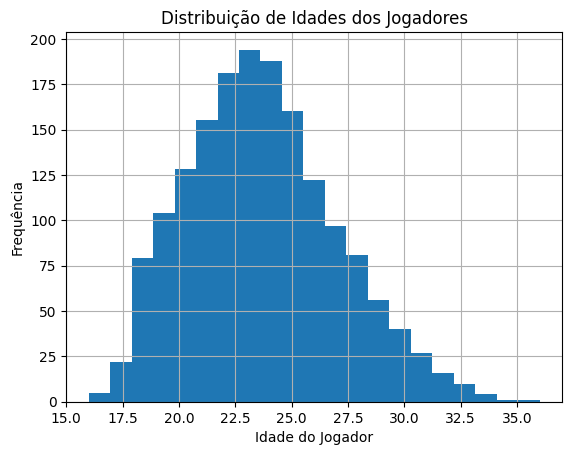

In [131]:
pl_transfers['playerAge'].hist(bins=21)
plt.xlabel('Idade do Jogador')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades dos Jogadores')
plt.show()

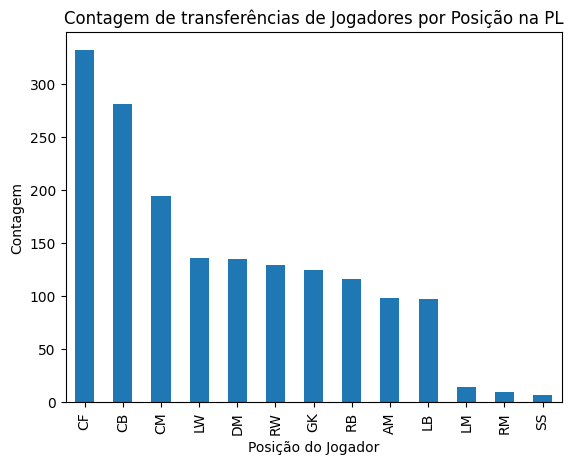

In [134]:
position_counts = pl_transfers['playerPos'].value_counts()

position_counts.plot(kind='bar')
plt.xlabel('Posição do Jogador')
plt.ylabel('Contagem')
plt.title('Contagem de transferências de Jogadores por Posição na PL')
plt.show()

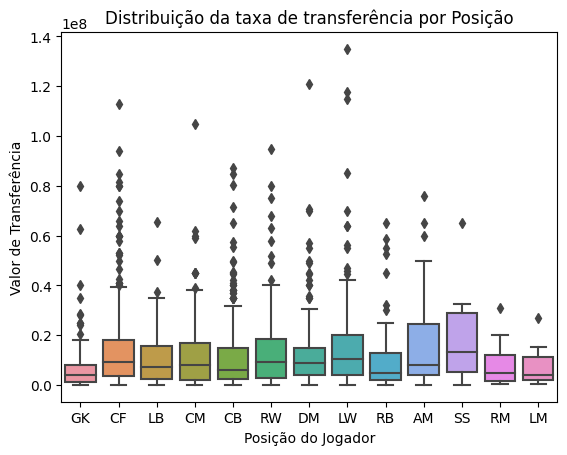

In [135]:
sns.boxplot(data=pl_transfers, x='playerPos', y='transferFee')
plt.xlabel('Posição do Jogador')
plt.ylabel('Valor de Transferência')
plt.title('Distribuição da taxa de transferência por Posição')
plt.show()

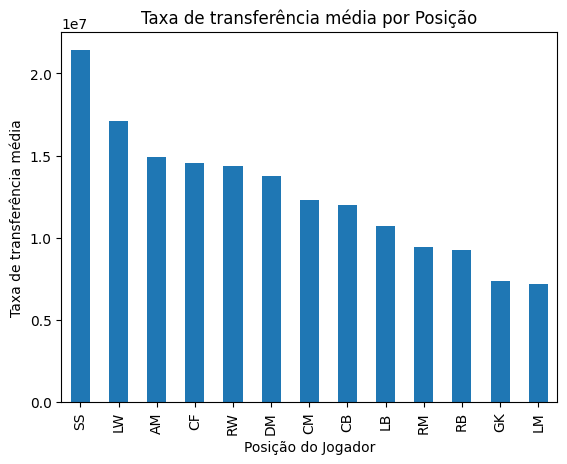

In [136]:
average_market_value_by_position = pl_transfers.groupby('playerPos')['transferFee'].mean()
average_market_value_by_position = average_market_value_by_position.sort_values(ascending=False)

average_market_value_by_position.plot(kind='bar')
plt.xlabel('Posição do Jogador')
plt.ylabel('Taxa de transferência média')
plt.title('Taxa de transferência média por Posição')
plt.show()

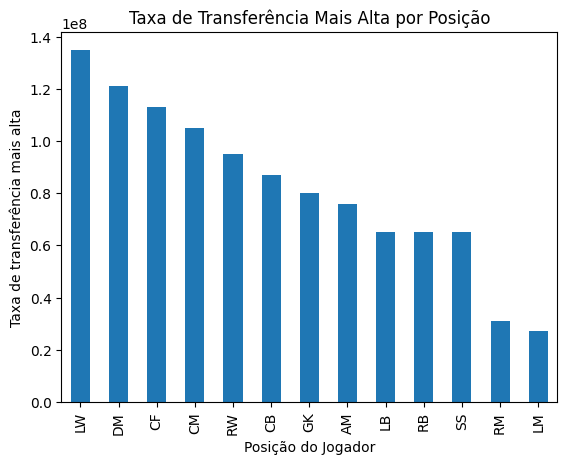

In [137]:
import matplotlib.pyplot as plt

highest_market_value_by_position = pl_transfers.groupby('playerPos')[
    'transferFee'].max()
highest_market_value_by_position = highest_market_value_by_position.sort_values(
    ascending=False)

highest_market_value_by_position.plot(kind='bar')
plt.xlabel('Posição do Jogador')
plt.ylabel('Taxa de transferência mais alta')
plt.title('Taxa de Transferência Mais Alta por Posição')
plt.show()

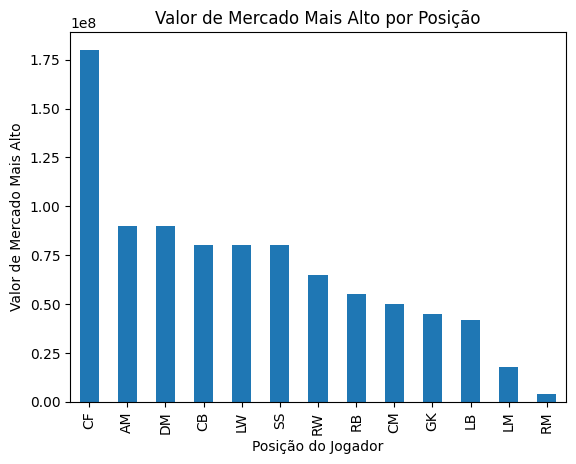

In [138]:
import matplotlib.pyplot as plt

highest_market_value_by_position = pl_transfers.groupby('playerPos')[
    'playerMarketValue'].max()
highest_market_value_by_position = highest_market_value_by_position.sort_values(
    ascending=False)

highest_market_value_by_position.plot(kind='bar')
plt.xlabel('Posição do Jogador')
plt.ylabel('Valor de Mercado Mais Alto')
plt.title('Valor de Mercado Mais Alto por Posição')
plt.show()

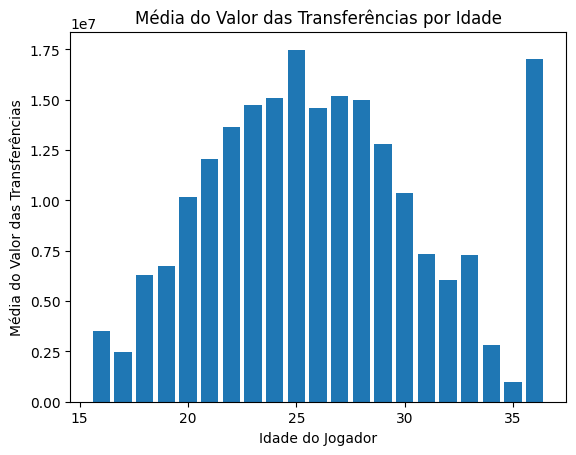

In [139]:
mean_transfer_fee_by_age = pl_transfers.groupby('playerAge')['transferFee'].mean()

plt.bar(mean_transfer_fee_by_age.index, mean_transfer_fee_by_age.values)
plt.xlabel('Idade do Jogador')
plt.ylabel('Média do Valor das Transferências')
plt.title('Média do Valor das Transferências por Idade')
plt.show()

In [122]:
pl_transfers_no_cris = pl_transfers[~((pl_transfers['playerName'] == 'Cristiano Ronaldo') & (pl_transfers['playerAge'] > 30))]

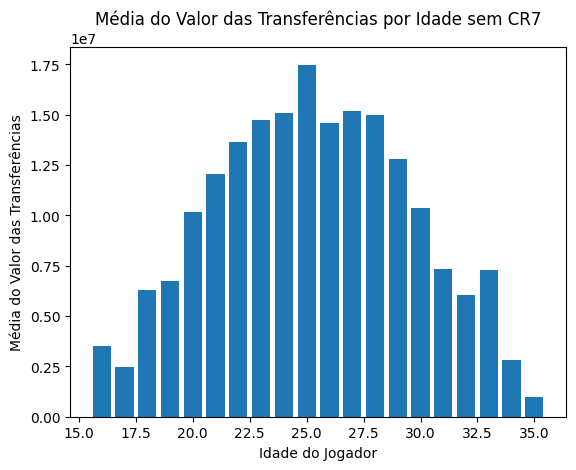

In [140]:
mean_transfer_fee_by_age = pl_transfers_no_cris.groupby('playerAge')['transferFee'].mean()

plt.bar(mean_transfer_fee_by_age.index, mean_transfer_fee_by_age.values)
plt.xlabel('Idade do Jogador')
plt.ylabel('Média do Valor das Transferências')
plt.title('Média do Valor das Transferências por Idade sem CR7')
plt.show()

Valor de mercado versus taxa de transferência: Você pode explorar a relação entre o valor de mercado atual do jogador e a taxa de transferência usando um gráfico de dispersão. Isso pode ajudar a identificar jogadores que foram transferidos por valores altos ou baixos em relação ao seu valor de mercado.

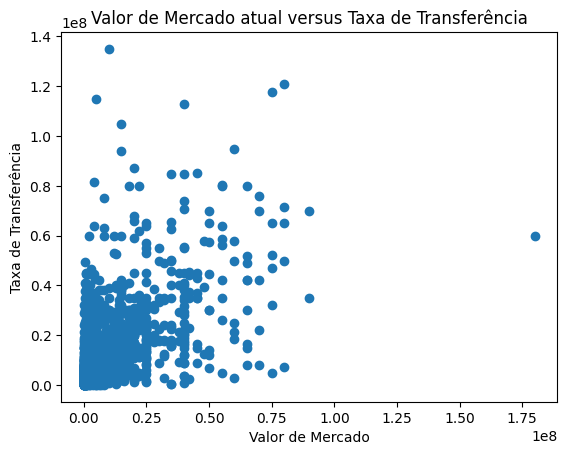

In [141]:
plt.scatter(pl_transfers['playerMarketValue'], pl_transfers['transferFee'])
plt.xlabel('Valor de Mercado')
plt.ylabel('Taxa de Transferência')
plt.title('Valor de Mercado atual versus Taxa de Transferência')
plt.show()

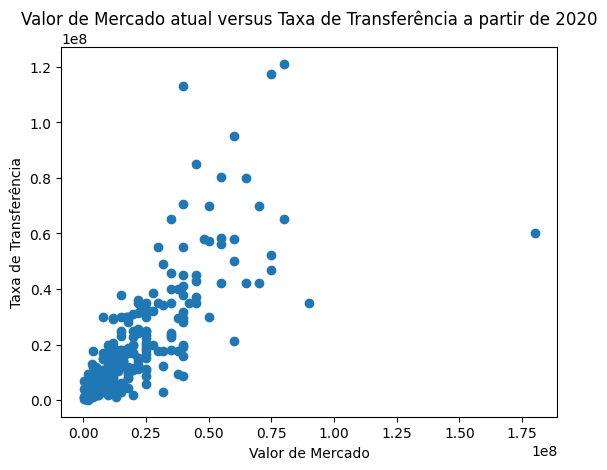

In [142]:
pl_transfers_2020 = pl_transfers[pl_transfers['season'] > 2020]
plt.scatter(pl_transfers_2020['playerMarketValue'], pl_transfers_2020['transferFee'])
plt.xlabel('Valor de Mercado')
plt.ylabel('Taxa de Transferência')
plt.title('Valor de Mercado atual versus Taxa de Transferência a partir de 2020')
plt.show()

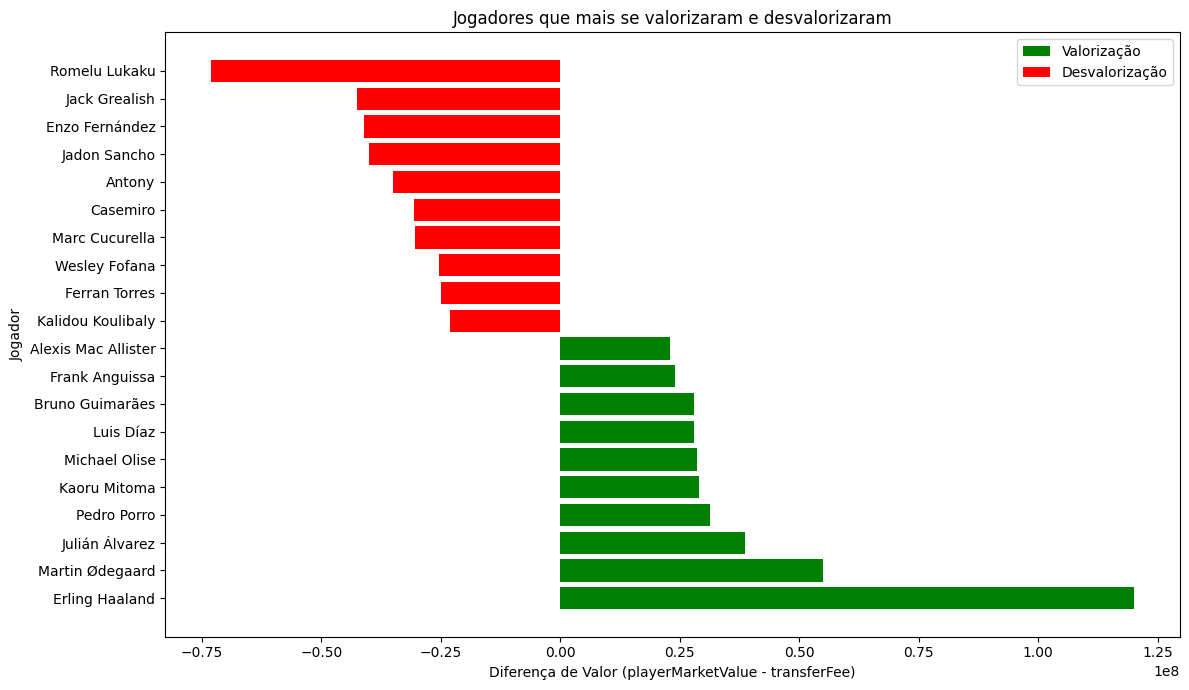

In [148]:
valuation_sorted = pl_transfers_2020.sort_values('valuation', ascending=False)

# Seleciona os 10 jogadores que mais se valorizaram
top_valorizacao = valuation_sorted.head(10)

# Seleciona os 10 jogadores que mais se desvalorizaram
top_desvalorizacao = valuation_sorted.tail(10)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(12, 7))

# Plotagem dos jogadores que mais se valorizaram
ax.barh(top_valorizacao['playerName'], top_valorizacao['valuation'], color='green', label='Valorização')

# Plotagem dos jogadores que mais se desvalorizaram
ax.barh(top_desvalorizacao['playerName'], top_desvalorizacao['valuation'], color='red', label='Desvalorização')

# Configurações adicionais do gráfico
ax.set_xlabel('Diferença de Valor (playerMarketValue - transferFee)')
ax.set_ylabel('Jogador')
ax.set_title('Jogadores que mais se valorizaram e desvalorizaram')
ax.legend()

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


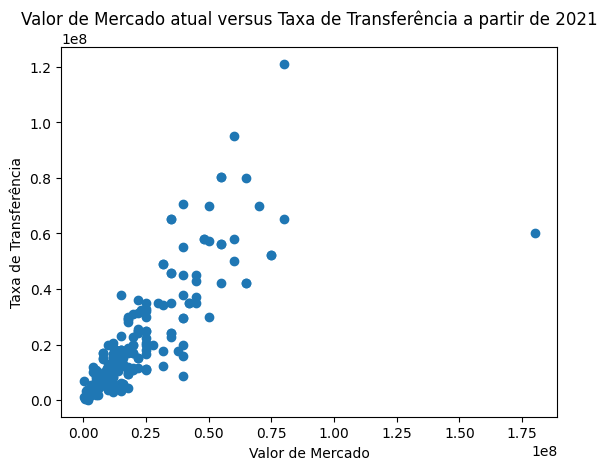

In [105]:
pl_transfers_2021 = pl_transfers[pl_transfers['season'] > 2021]
plt.scatter(pl_transfers_2021['playerMarketValue'], pl_transfers_2021['transferFee'])
plt.xlabel('Valor de Mercado')
plt.ylabel('Taxa de Transferência')
plt.title('Valor de Mercado atual versus Taxa de Transferência a partir de 2021')
plt.show()

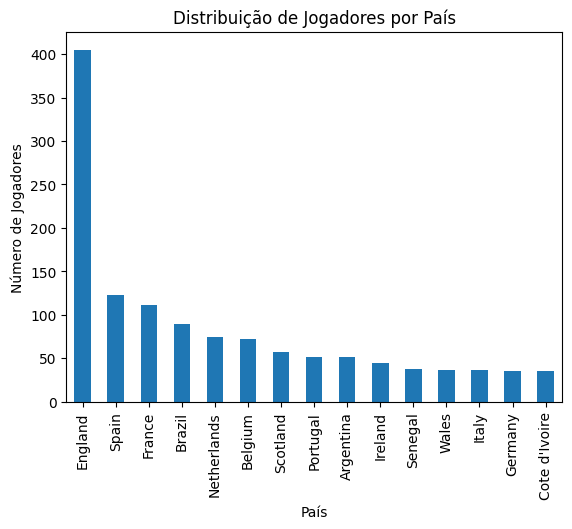

In [106]:
country_counts = pl_transfers['playerCountry'].value_counts().head(15)
country_counts.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Número de Jogadores')
plt.title('Distribuição de Jogadores por País')
plt.show()

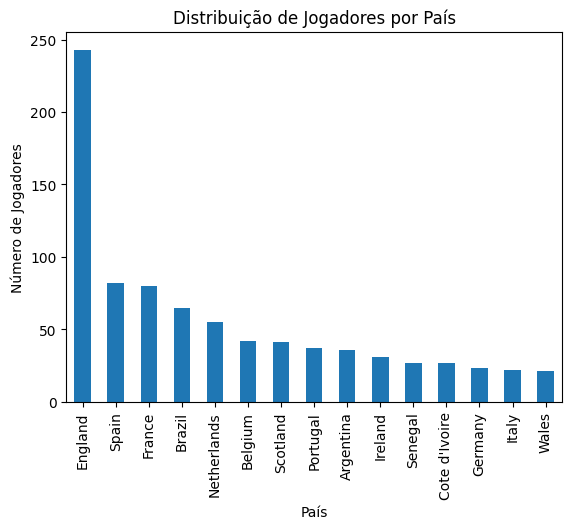

In [107]:
country_counts = pl_transfers['playerCountry'].value_counts().head(15)
country_counts.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Número de Jogadores')
plt.title('Distribuição de Jogadores por País')
plt.show()

Top 15 sem inglaterra

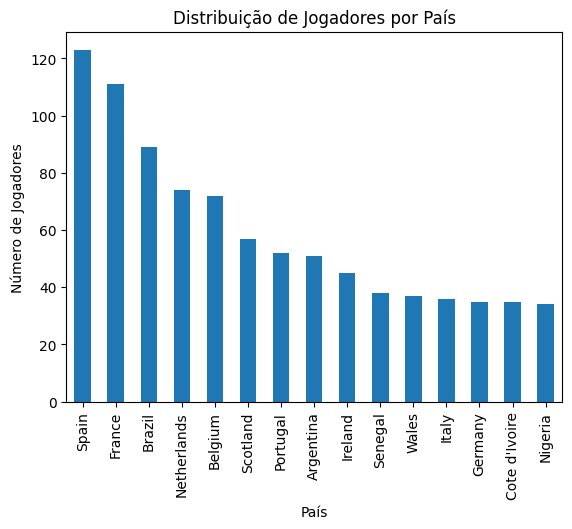

In [64]:
country_counts = pl_transfers['playerCountry'].value_counts().head(16).tail(15)
country_counts.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Número de Jogadores')
plt.title('Distribuição de Jogadores por País')
plt.show()

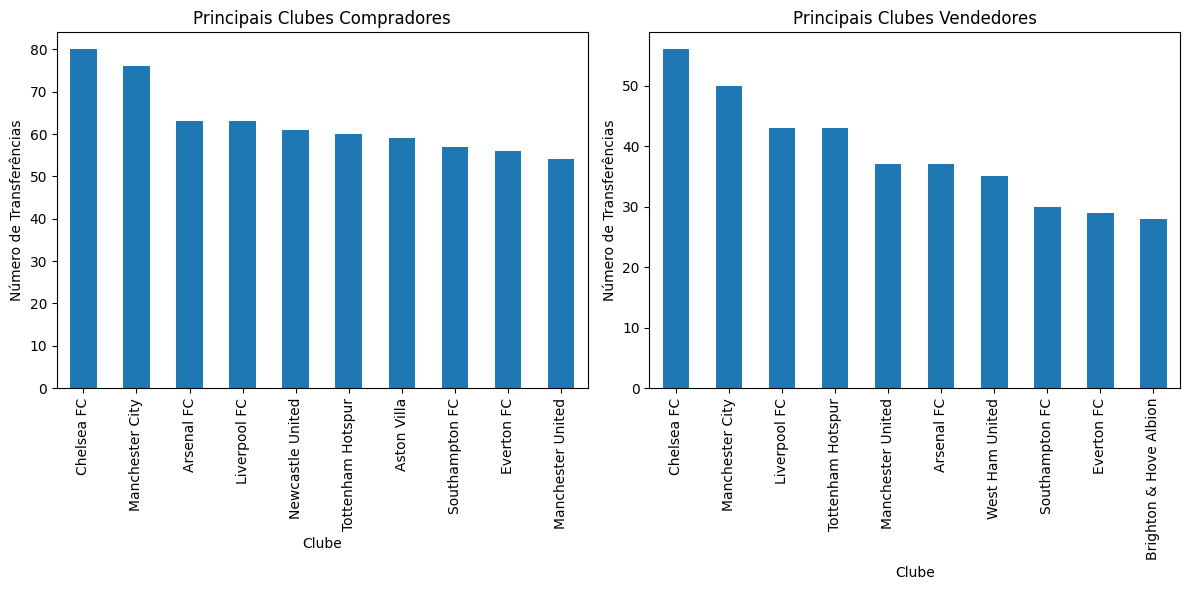

In [150]:
top_buyers = pl_transfers['clubJoined'].value_counts().nlargest(10)
top_sellers = pl_transfers['clubLeft'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
plt.subplot(121)
top_buyers.plot(kind='bar')
plt.xlabel('Clube')
plt.ylabel('Número de Transferências')
plt.title('Principais Clubes Compradores')

plt.subplot(122)
top_sellers.plot(kind='bar')
plt.xlabel('Clube')
plt.ylabel('Número de Transferências')
plt.title('Principais Clubes Vendedores')

plt.tight_layout()
plt.show()

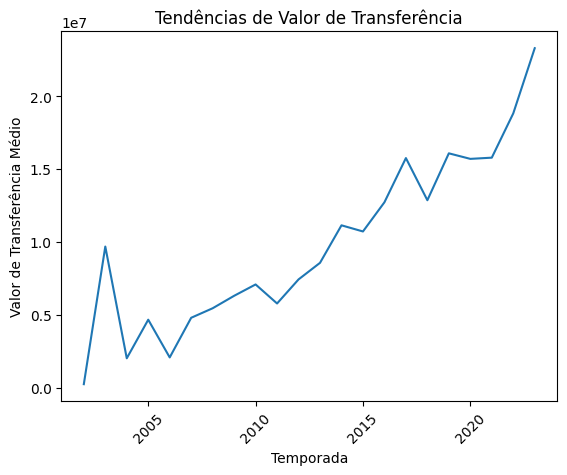

In [151]:
transfer_value_trends = pl_transfers.groupby('season')['transferFee'].mean()

plt.plot(transfer_value_trends.index, transfer_value_trends.values)
plt.xlabel('Temporada')
plt.ylabel('Valor de Transferência Médio')
plt.title('Tendências de Valor de Transferência')
plt.xticks(rotation=45)
plt.show()

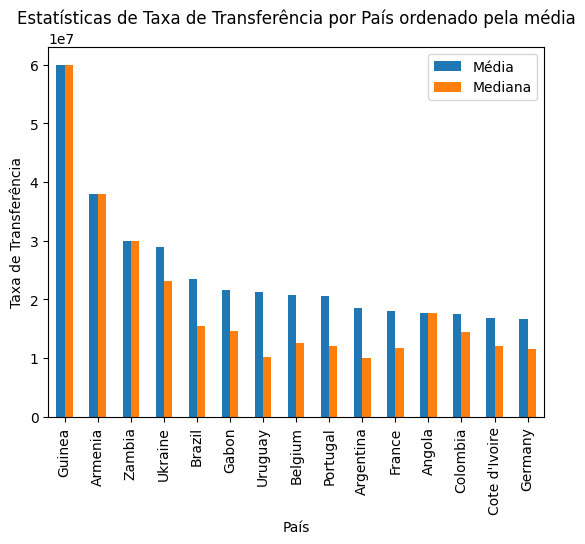

In [152]:
country_stats = pl_transfers.groupby('playerCountry')['transferFee'].agg(['mean', 'median'])
top_countries = country_stats.nlargest(15, 'mean')

top_countries.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Taxa de Transferência')
plt.title('Estatísticas de Taxa de Transferência por País ordenado pela média')
plt.legend(['Média', 'Mediana'])
plt.show()

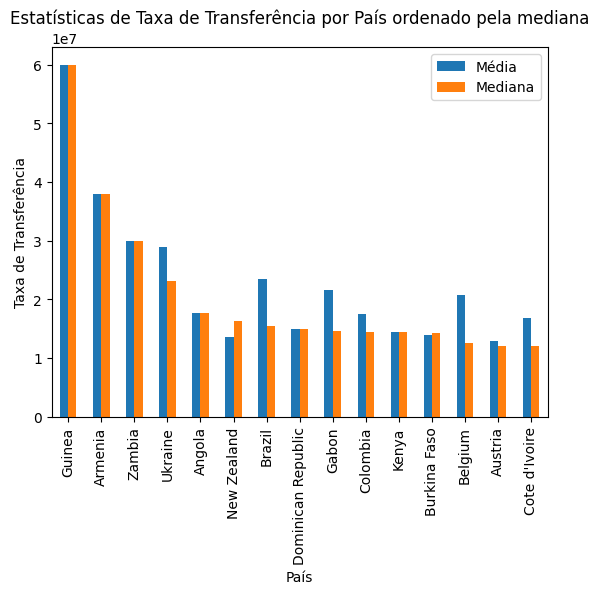

In [153]:
country_stats = pl_transfers.groupby('playerCountry')['transferFee'].agg(['mean', 'median'])
top_countries = country_stats.nlargest(15, 'median')

top_countries.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Taxa de Transferência')
plt.title('Estatísticas de Taxa de Transferência por País ordenado pela mediana')
plt.legend(['Média', 'Mediana'])
plt.show()

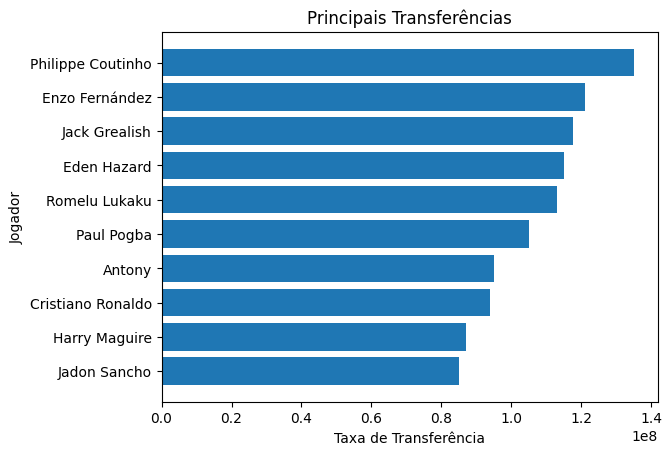

In [154]:
top_transfers = pl_transfers.nlargest(10, 'transferFee')

plt.barh(top_transfers['playerName'], top_transfers['transferFee'])
plt.xlabel('Taxa de Transferência')
plt.ylabel('Jogador')
plt.title('Principais Transferências')
plt.gca().invert_yaxis()
plt.show()

/tmp/ipykernel_507831/3143846198.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


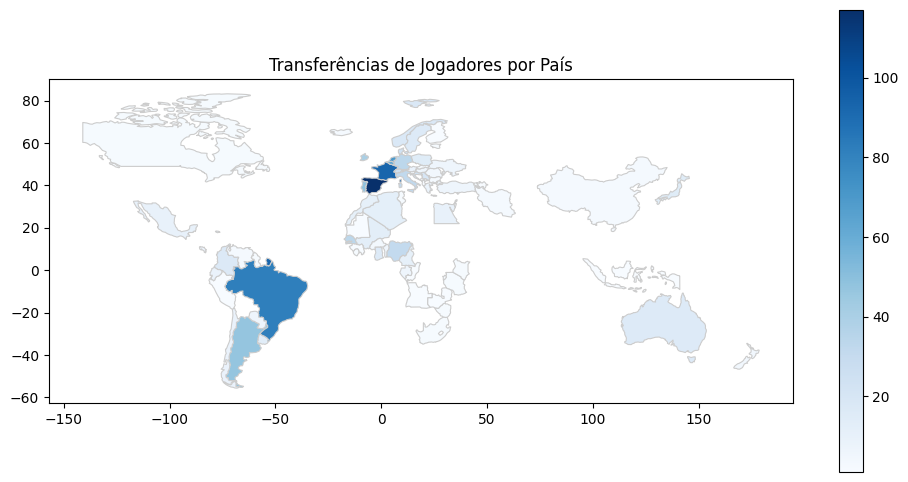

In [155]:
import geopandas as gpd

# Carregar arquivo shapefile com os dados geográficos dos países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calcular o número de transferências por país
transfer_counts = pl_transfers['playerCountry'].value_counts()
transfer_counts = transfer_counts.reset_index()
transfer_counts.columns = ['country', 'transfer_count']

# Mesclar dados geográficos com dados de transferências
merged_data = world.merge(transfer_counts, left_on='name', right_on='country', how='left')

# Plotar o mapa de transferências
fig, ax = plt.subplots(figsize=(12, 6))
merged_data.plot(column='transfer_count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Transferências de Jogadores por País')
plt.show()

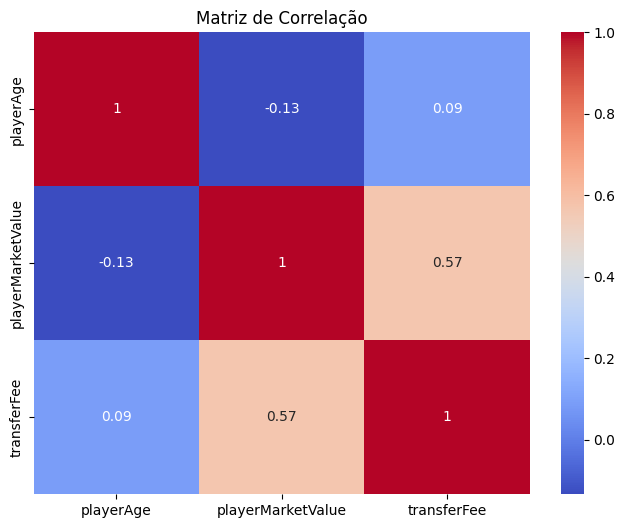

In [156]:
correlation_matrix = pl_transfers[['playerAge', 'playerMarketValue', 'transferFee']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Pré-processamento dos dados
Nesta seção realizaremos o tratamento dos dados, removendo outliers, normalizando, padronizando e transformando os dados

# Construção do modelo
Nesta seção abordaremos a construção de um modelo de precificação dos jogadores

## Divisão dos dados
Nessa subseção iremos separar os dados em um conjunto de treinamento e um conjunto de teste